In [5]:
%cd ..
%load_ext kedro.ipython

[04/24/24 17:00:56] WARNING  /home/ventus/.local/share/virtualenvs/raccoon-spotter-qyvMo8Bh/lib/pyt ]8;id=306699;file:///usr/lib64/python3.10/warnings.py\warnings.py]8;;\:]8;id=438242;file:///usr/lib64/python3.10/warnings.py#109\109]8;;\
                             hon3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning:                    
                             This is now an optional IPython functionality, setting dhist requires                 
                             you to install the `pickleshare` library.                                             
                               self.shell.db['dhist'] = compress_dhist(dhist)[-100:]                               
                                                                                                                   

/home/ventus/Documents
The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [6]:
from raccoon_spotter.utils.data_visualization import *
from raccoon_spotter.utils.metrics import *

In [7]:
X, Y = catalog.load("raccoon_features_data_array").values(); Y = Y.astype(np.float32)
pretrained_model = catalog.load("pretrained_model")
trained_model = catalog.load("trained_model")

[04/24/24 17:01:00] INFO     Loading data from raccoon_features_data_array (NPZArrayDataset)... ]8;id=227876;file:///home/ventus/.local/share/virtualenvs/raccoon-spotter-qyvMo8Bh/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=662945;file:///home/ventus/.local/share/virtualenvs/raccoon-spotter-qyvMo8Bh/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\

[04/24/24 17:01:01] INFO     Loading data from pretrained_model (KerasModelDataset)...          ]8;id=329655;file:///home/ventus/.local/share/virtualenvs/raccoon-spotter-qyvMo8Bh/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=339005;file:///home/ventus/.local/share/virtualenvs/raccoon-spotter-qyvMo8Bh/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\

                    INFO     Loading data from trained_model (KerasModelDataset)...             ]8;id=418317;file:///home/ventus/.local/share/virtualenvs/raccoon-spotter-qyvMo8Bh/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=955071;file:///home/ventus/.local/share/virtualenvs/raccoon-spotter-qyvMo8Bh/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\

                    WARNING  /home/ventus/.local/share/virtualenvs/raccoon-spotter-qyvMo8Bh/lib/pyt ]8;id=262465;file:///usr/lib64/python3.10/warnings.py\warnings.py]8;;\:]8;id=524789;file:///usr/lib64/python3.10/warnings.py#109\109]8;;\
                             hon3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:                        
                             use_inf_as_na option is deprecated and will be removed in a future                    
                             version. Convert inf values to NaN before operating instead.                          
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

                    WARNING  /home/ventus/.local/share/virtualenvs/raccoon-spotter-qyvMo8Bh/lib/pyt ]8;id=426416;file:///usr/lib64/python3.10/warnings.py\warnings.py]8;;\:]8;id=730770;file:///usr/lib64/python3.10/warnings.py#109\109]8;;\
                             hon3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When                   
                             grouping with a length-1 list-like, you will need to pass a length-1                  
                             tuple to get_group in a future version of pandas. Pass `(name,)`                      
                             instead of `name` to silence this warning.                                            
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

                    WARNING  /home/ventus/.local/share/virtualenvs/raccoon-spotter-qyvMo8Bh/lib/pyt ]8;id=529497;file:///usr/lib64/python3.10/warnings.py\warnings.py]8;;\:]8;id=612495;file:///usr/lib64/python3.10/warnings.py#109\109]8;;\
                             hon3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When                   
                             grouping with a length-1 list-like, you will need to pass a length-1                  
                             tuple to get_group in a future version of pandas. Pass `(name,)`                      
                             instead of `name` to silence this warning.                                            
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

[04/24/24 17:01:02] WARNING  /home/ventus/.local/share/virtualenvs/raccoon-spotter-qyvMo8Bh/lib/pyt ]8;id=411808;file:///usr/lib64/python3.10/warnings.py\warnings.py]8;;\:]8;id=306222;file:///usr/lib64/python3.10/warnings.py#109\109]8;;\
                             hon3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When                   
                             grouping with a length-1 list-like, you will need to pass a length-1                  
                             tuple to get_group in a future version of pandas. Pass `(name,)`                      
                             instead of `name` to silence this warning.                                            
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

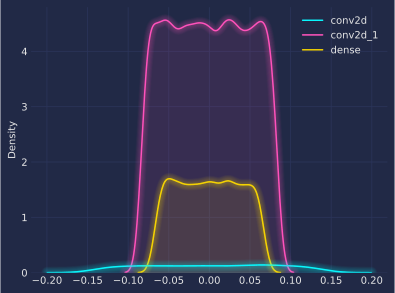

In [8]:
layer_means = {layer.name: layer.weights[0].numpy().flatten() for layer in pretrained_model.layers if "conv" in layer.name or "dense" in layer.name}
kdeplot(layer_means)
plt.show()

In [5]:
P0 = pretrained_model.predict(X)
P1 = trained_model.predict(X)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step


In [6]:
mse0 = mse(P0, Y)
mse1 = mse(P1, Y)
cos0 = 1+cos(P0, Y)
cos1 = 1+cos(P1, Y)
iou0 = 1-iou(P0, Y)
iou1 = 1-iou(P1, Y)

In [7]:
# normalize the metrics for comparison
scaled = lambda array: array / max(array)
mse0, mse1 = scaled(np.array([mse0, mse1]))
cos0, cos1 = scaled(np.array([cos0, cos1]))
iou0, iou1 = scaled(np.array([iou0, iou1]))

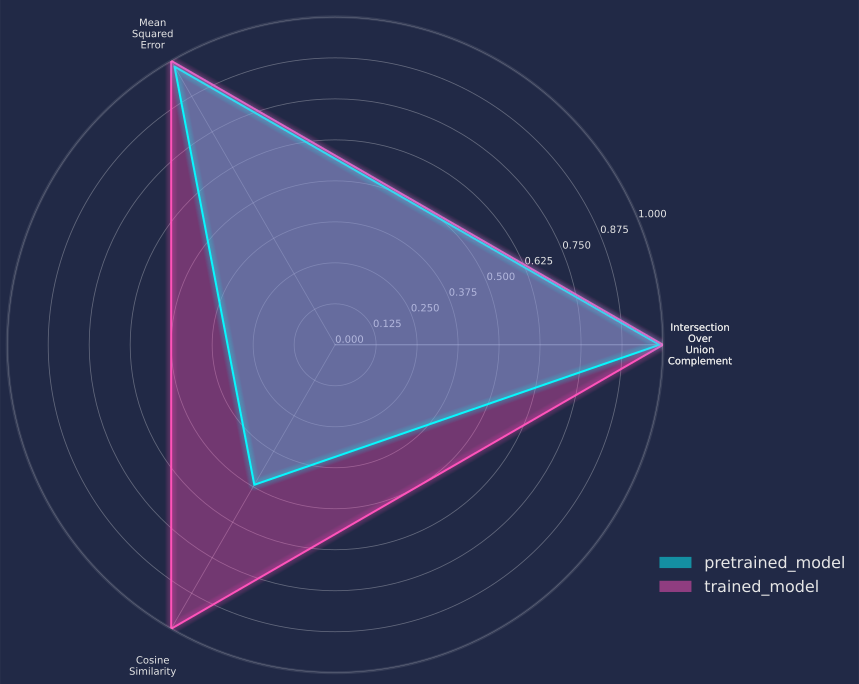

In [8]:
radialplot(
	["Intersection\nOver\nUnion\nComplement", "\nMean\nSquared\nError", "\nCosine\nSimilarity"],
	dict(
		pretrained_model=[iou0, mse0, cos0],
		trained_model=[iou1, mse1, cos1]
	),
	intervals = 9
)